# AutoSPARCOM - Raw Patches

## Imports

In [1]:
from DataRawPatches import DataRawPatches
from Models import DecoderEncoder,EncoderDecoder
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch
import scipy
import skimage
from itertools import chain
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from VGGLoss import VGGDistance,VGGL2Distance
import sys
import scipy.ndimage

## Benchmark - bicubic Interpolation

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


(-0.5, 255.5, 255.5, -0.5)

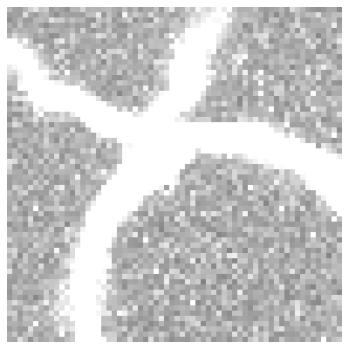

In [3]:
data_path = '/home/projects/yonina/yairb/autosparcom/data/MTO/sequence-as-stack-MT0.N1.HD-2D-Exp.tif'
#data_path = '/home/projects/yonina/yairb/autosparcom/data/BT_HD/BT_HD_stack.tif'
scale_factor = 4 

X = io.imread(data_path)
X = X.astype(float)
X_t = torch.tensor(X.astype(float)).unsqueeze_(1)
X_interpp = F.interpolate(X_t, scale_factor=scale_factor, mode='nearest')
X = X_interpp.squeeze_(1).cpu().detach().numpy()
for i in range(X.shape[0]):
    f = X[i,:,:]
    i99 = np.percentile(f, 99)
    f[f > i99] = i99
    max_f = f.max()
    min_f = f.min()
    X[i,:,:] = (f - min_f) / (max_f - min_f)

xmax = np.amax(X, axis=0)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 12))
ax.imshow(xmax, cmap="gray", vmin=0, vmax=1)
ax.axis('off')

## Tests - Dynamic range & filtering

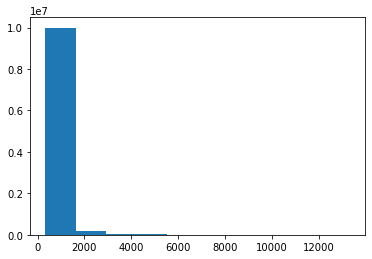

In [91]:
h = np.histogram(X)
plt.hist(X.flatten(), bins = h[1]) 
plt.show()

In [92]:
h

(array([9992127,  178375,   48699,   15583,    3716,    1113,     291,
             67,      21,       8]),
 array([  337. ,  1634.5,  2932. ,  4229.5,  5527. ,  6824.5,  8122. ,
         9419.5, 10717. , 12014.5, 13312. ]))

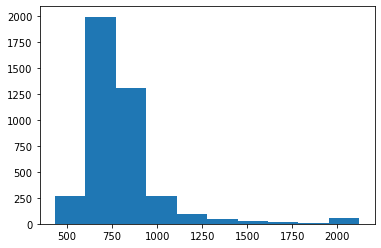

In [156]:
h = np.histogram(x)
plt.hist(x.flatten(), bins = h[1]) 
plt.show()

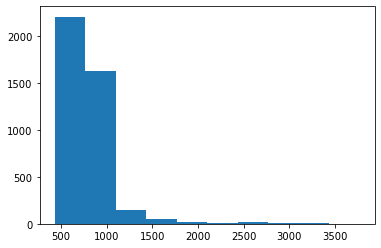

In [157]:
h = np.histogram(X[1543,:,:])
plt.hist(X[1543,:,:].flatten(), bins = h[1]) 
plt.show()

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


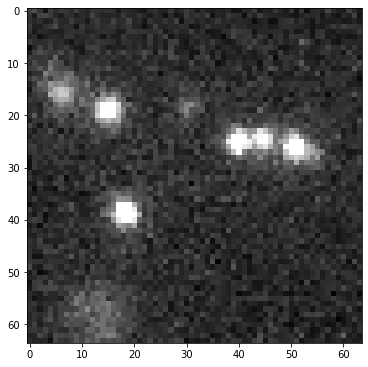

In [155]:
data_path = '/home/projects/yonina/yairb/autosparcom/data/MTO/sequence-as-stack-MT0.N1.HD-2D-Exp.tif'
#data_path = '/home/projects/yonina/yairb/autosparcom/data/BT_HD/BT_HD_stack.tif'
X = io.imread(data_path)
X = X.astype(float)
x = X[1543,:,:].copy()
i99 = np.percentile(x, 99)
x[x > i99] = i99
# m = x[xstd > xstd.mean()].min()
# x[xstd < xstd.mean()] = m
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 12))
# x = (x - x.min())/(x.max() - x.min())
ax.imshow(x, cmap="gray")

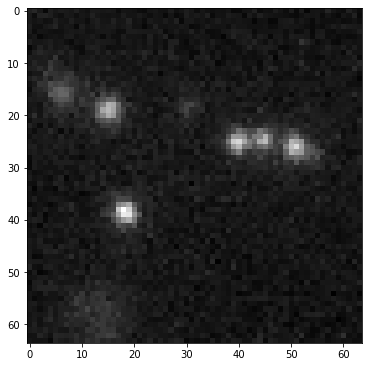

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 12))
ax.imshow(X[1543,:,:], cmap="gray")

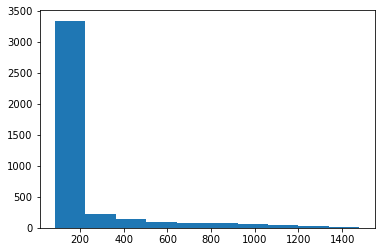

In [124]:
xstd = X.std(axis=0)
h = np.histogram(xstd)
plt.hist(xstd.flatten(), bins = h[1]) 
plt.show()

In [70]:
h

(array([3338,  216,  139,   95,   82,   72,   62,   43,   35,   14]),
 array([  85.3680741 ,  224.65996602,  363.95185794,  503.24374987,
         642.53564179,  781.82753371,  921.11942563, 1060.41131755,
        1199.70320947, 1338.99510139, 1478.28699331]))

In [141]:
i1 = np.percentile(xstd, 75)

In [142]:
i1

157.15497016066473

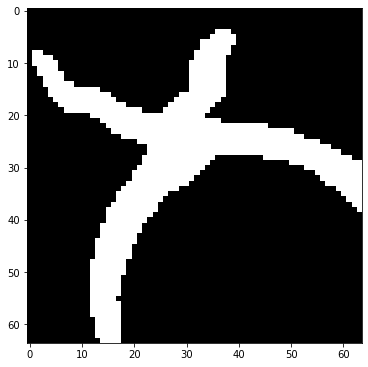

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 12))
ax.imshow(xstd>xstd.mean(), cmap="gray")

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


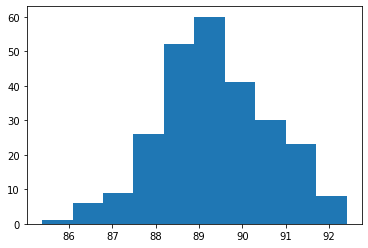

In [66]:
data_path = '/home/projects/yonina/yairb/autosparcom/data/MTO/sequence-as-stack-MT0.N1.HD-2D-Exp.tif'
#data_path = '/home/projects/yonina/yairb/autosparcom/data/BT_HD/BT_HD_stack.tif'
scale_factor = 4 
X = io.imread(data_path)
X = X.astype(float)
xstd = X[:,48:64,48:64].std(axis=0)
h = np.histogram(xstd)
plt.hist(xstd.flatten(), bins = h[1]) 
plt.show()

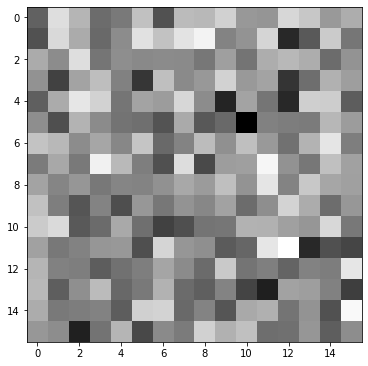

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 12))
ax.imshow(xstd, cmap="gray")
# ax.axis('off')

In [68]:
h

(array([ 1,  6,  9, 26, 52, 60, 41, 30, 23,  8]),
 array([85.37809242, 86.08084335, 86.78359427, 87.4863452 , 88.18909612,
        88.89184705, 89.59459797, 90.29734889, 91.00009982, 91.70285074,
        92.40560167]))

In [ ]:
X = io.imread(data_path)
X = X.astype(float)
xstd = X[:,0:16,30:46].std(axis=0)
h = np.histogram(xstd)
for i in range(0,)

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


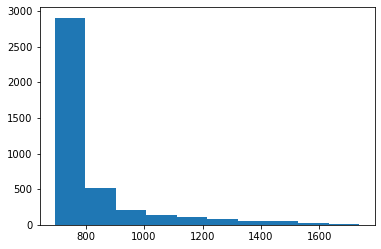

In [74]:
data_path = '/home/projects/yonina/yairb/autosparcom/data/MTO/sequence-as-stack-MT0.N1.HD-2D-Exp.tif'
#data_path = '/home/projects/yonina/yairb/autosparcom/data/BT_HD/BT_HD_stack.tif'
scale_factor = 4 
X = io.imread(data_path)
X = X.astype(float)
xmean = X.mean(axis=0)
h = np.histogram(xmean)
plt.hist(xmean.flatten(), bins = h[1]) 
plt.show()

In [75]:
h

(array([2905,  521,  204,  137,  104,   75,   54,   48,   32,   16]),
 array([ 695.1608 ,  799.27408,  903.38736, 1007.50064, 1111.61392,
        1215.7272 , 1319.84048, 1423.95376, 1528.06704, 1632.18032,
        1736.2936 ]))

In [86]:
xmean.max()

1736.2936

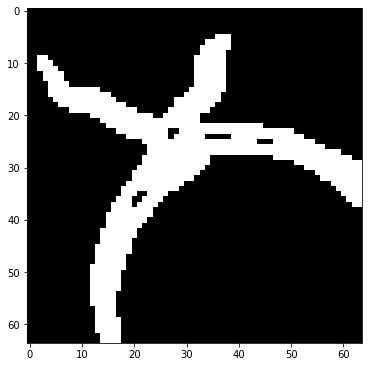

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 12))
ax.imshow((xstd>224)*(xmean<1632), cmap="gray")
# ax.axis('off')

## Training

In [60]:
data_path = '/home/projects/yonina/yairb/autosparcom/data/MTO/sequence-as-stack-MT0.N1.HD-2D-Exp.tif'
#data_path = '/home/projects/yonina/yairb/autosparcom/data/BT_HD/BT_HD_stack.tif'
patch_size = 32
batch_size = 16
scale_factor = 4
kernel_size = 25
lista_folds = 10
learning_rate = 0.01
no_of_batches_per_epoch = 100
no_of_epochs = 100

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

trainset = DataRawPatches(data_path,ps=patch_size)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)

encoder_decoder = DecoderEncoder(lista_folds=lista_folds, kernel_size=kernel_size)
encoder_decoder = nn.DataParallel(encoder_decoder)
encoder_decoder = encoder_decoder.to(device)

criterion_mse = nn.MSELoss()
criterion_l1 = nn.L1Loss()
optimizer = torch.optim.Adam(encoder_decoder.parameters(), lr = learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=no_of_batches_per_epoch, eta_min=0.0001)

vgg_dist = nn.DataParallel(VGGDistance())
vgg_dist = vgg_dist.float()
vgg_dist = vgg_dist.to(device)
vgg_l2_dist = nn.DataParallel(VGGL2Distance())
vgg_l2_dist = vgg_l2_dist.float()
vgg_l2_dist = vgg_l2_dist.to(device)

for epoch in range(no_of_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inpt, label = data
        inpt = inpt.float()
        label = label.float()
        inpt = inpt.to(device)
        label = label.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward 
        encoder_output, decoder_output = encoder_decoder(inpt, False)
        
        
        # label = torch.zeros_like(decoder_output)
        # loss_vgg_l1 = vgg_dist(encoder_output, label)
        # loss_vgg_l2 = vgg_l2_dist(encoder_output, label)
        loss_l1_reg = criterion_l1(decoder_output, torch.zeros_like(decoder_output))
        loss_l1 = criterion_l1(encoder_output, label)
        loss_l2 = criterion_mse(encoder_output, label)
        
        loss = loss_l2 + loss_l1_reg
        
        loss.sum().backward()
        optimizer.step()
        scheduler.step()
        
        running_loss += loss.sum().item()

        
    print(f'[{epoch + 1}] loss: {running_loss / no_of_batches_per_epoch:.8f}')

print('Finished Training')

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


[1] loss: 105287.73316473
[2] loss: 43.55082724
[3] loss: 23.53835513
[4] loss: 13.66978197
[5] loss: 8.82053848
[6] loss: 6.58882287
[7] loss: 5.49454778


## Inference

### Entire frame

In [53]:
X = io.imread(data_path)
for i in range(X.shape[0]):
    f = X[i,:,:]
    i99 = np.percentile(f, 99)
    f[f > i99] = i99
    max_f = f.max()
    min_f = f.min()
    X[i,:,:] = (f - min_f) / (max_f - min_f)
X_t = torch.tensor(X.astype(float)).unsqueeze_(1)
array_result = torch.zeros(X_t.shape[0], X_t.shape[1], int(X_t.shape[2]*scale_factor), int(X_t.shape[2]*scale_factor))

for i in range(X_t.shape[0]):
    with torch.no_grad():
        decoder_input = X_t[i,:,:,:].unsqueeze_(0)
        _ , decoder_output = encoder_decoder(decoder_input, True)
        # v_min, v_max = decoder_output.min(), decoder_output.max()
        # new_min, new_max = 0, 1
        # decoder_output = (decoder_output - v_min)/(v_max - v_min)*(new_max - new_min) + new_min
    array_result[i,:,:,:] = decoder_output[0,:,:,:]

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


### Patch-based

In [ ]:
X = io.imread(data_path)
X_t = torch.tensor(X.astype(float)).unsqueeze_(1)
array_result = torch.zeros(X_t.shape[0], X_t.shape[1], int(X_t.shape[2]*scale_factor), int(X_t.shape[2]*scale_factor))

for i in range(X_t.shape[0]):
    with torch.no_grad():
        f = X_t[i,:,:,:].unsqueeze_(0)
        H = f.shape[2]
        W = f.shape[3]
        kh, kw = int(H/scale_factor), int(H/scale_factor)  # kernel size
        dh, dw = int(W/scale_factor/2), int(W/scale_factor/2)  # stride
        patches = f.unfold(2, kh, dh).unfold(3, kw, dw)
        unfold_shape = list(patches.size())
        patches = patches.contiguous().view(patches.size(0), -1, kh, kw)
#         for j in range(patches.shape[1]):
#             p = patches[0,j,:,:]
#             v_min, v_max = p.min(), p.max()
#             new_min, new_max = 0, 1
#             p = (p - v_min)/(v_max - v_min)*(new_max - new_min) + new_min
#             patches[0,j,:,:] = p

        # perform the operations on each patch
        _ , out_patches = encoder_decoder(patches.permute(1,0,2,3), True)
        out_patches = out_patches.cpu().detach()
        window1d = np.abs(np.hanning(H))
        window2d = np.sqrt(np.outer(window1d,window1d))
        smooth_win = torch.broadcast_to(torch.tensor(window2d), out_patches.shape)
        out_patches = out_patches*smooth_win

        # Reshape back
        kernel_size = H
        stride = int(W/2)
        unfold_shape[4] = int(unfold_shape[4]*scale_factor)
        unfold_shape[5] = int(unfold_shape[5]*scale_factor)
        
        out_patches_orig = out_patches.permute(1,0,2,3).view(unfold_shape)
        out_patches_orig = out_patches_orig.contiguous().view(1, 1, -1, kernel_size*kernel_size)
        out_patches_orig = out_patches_orig.permute(0, 1, 3, 2) 
        out_patches_orig = out_patches_orig.contiguous().view(1, kernel_size*kernel_size, -1)
        out_patches_orig = torch.nn.functional.fold(
            out_patches_orig, output_size=(H*scale_factor, W*scale_factor), kernel_size=kernel_size, stride=stride)
        output = np.squeeze(out_patches_orig.permute(0,2,3,1).numpy())
        
    array_result[i,0,:,:] = torch.tensor(output)

### Display results

In [54]:
data_filename = 'sequence-as-stack-MT0.N1.HD-2D-Exp_gt.tif'
#data_filename = 'Ground-truth-BT_HD/BT_HD_stack_gt.tif'
im_gt = io.imread('/home/projects/yonina/yairb/autosparcom/data/%s' % (data_filename))
im_gt = 1*im_gt

res = array_result.squeeze_(1).cpu().detach().numpy()
# res = np.nan_to_num(res)

res1 = np.amax(res, axis=0)
res2 = np.std(res, axis=0)
res3 = np.mean(res, axis=0)

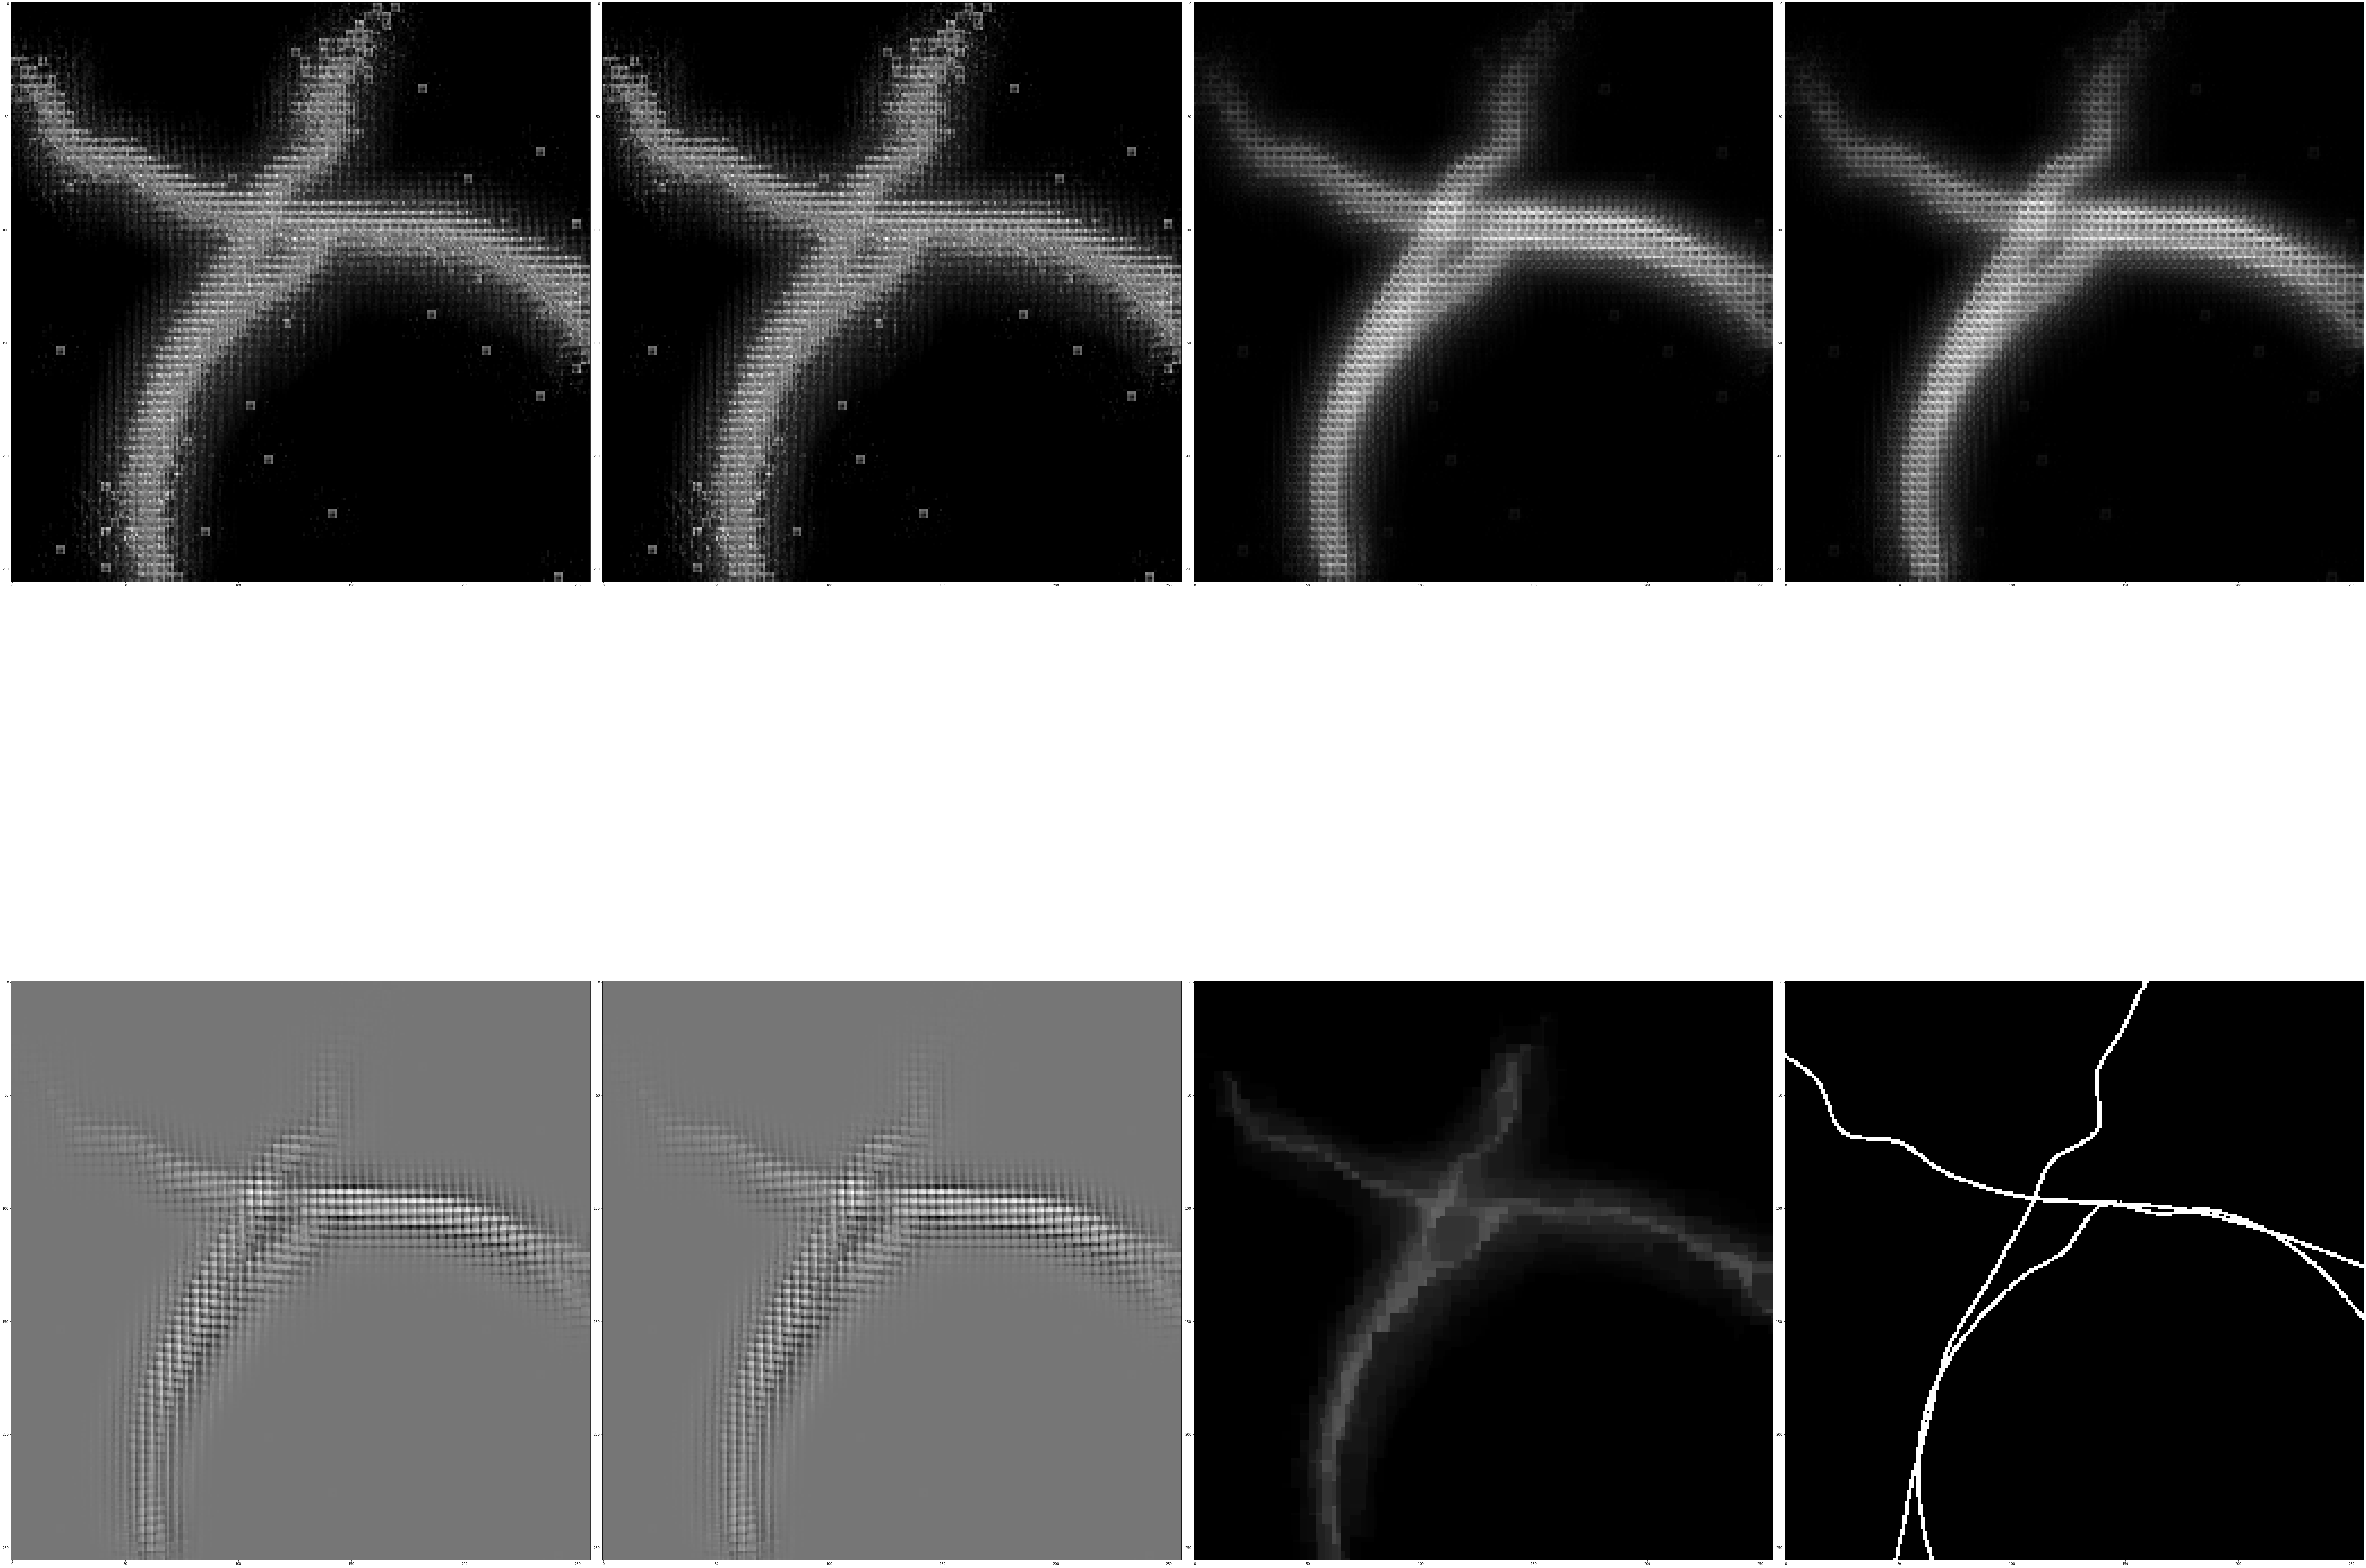

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(100, 100))

ax[0,0].imshow(res1, cmap="gray")#, vmin=0, vmax=1)
normalized_res1=(res1-np.amin(res1))/(np.amax(res1)-np.amin(res1))
ax[0,1].imshow(normalized_res1, cmap="gray", vmin=0, vmax=1)

ax[0,2].imshow(res2, cmap="gray")#, vmin=0, vmax=1)
normalized_res2=(res2-np.amin(res2))/(np.amax(res2)-np.amin(res2))
ax[0,3].imshow(normalized_res2, cmap="gray", vmin=0, vmax=1)

ax[1,0].imshow(res3, cmap="gray")#, vmin=0, vmax=1)
normalized_res3=(res3-np.amin(res3))/(np.amax(res3)-np.amin(res3))
ax[1,1].imshow(normalized_res3, cmap="gray", vmin=0, vmax=1)

ax[1,2].imshow(scipy.ndimage.minimum_filter(normalized_res1,size=11), cmap="gray", vmin=0, vmax=1)
ax[1,3].imshow(im_gt, cmap="gray", vmin=0, vmax=1)

plt.tight_layout()
plt.show()

(-0.5, 255.5, 255.5, -0.5)

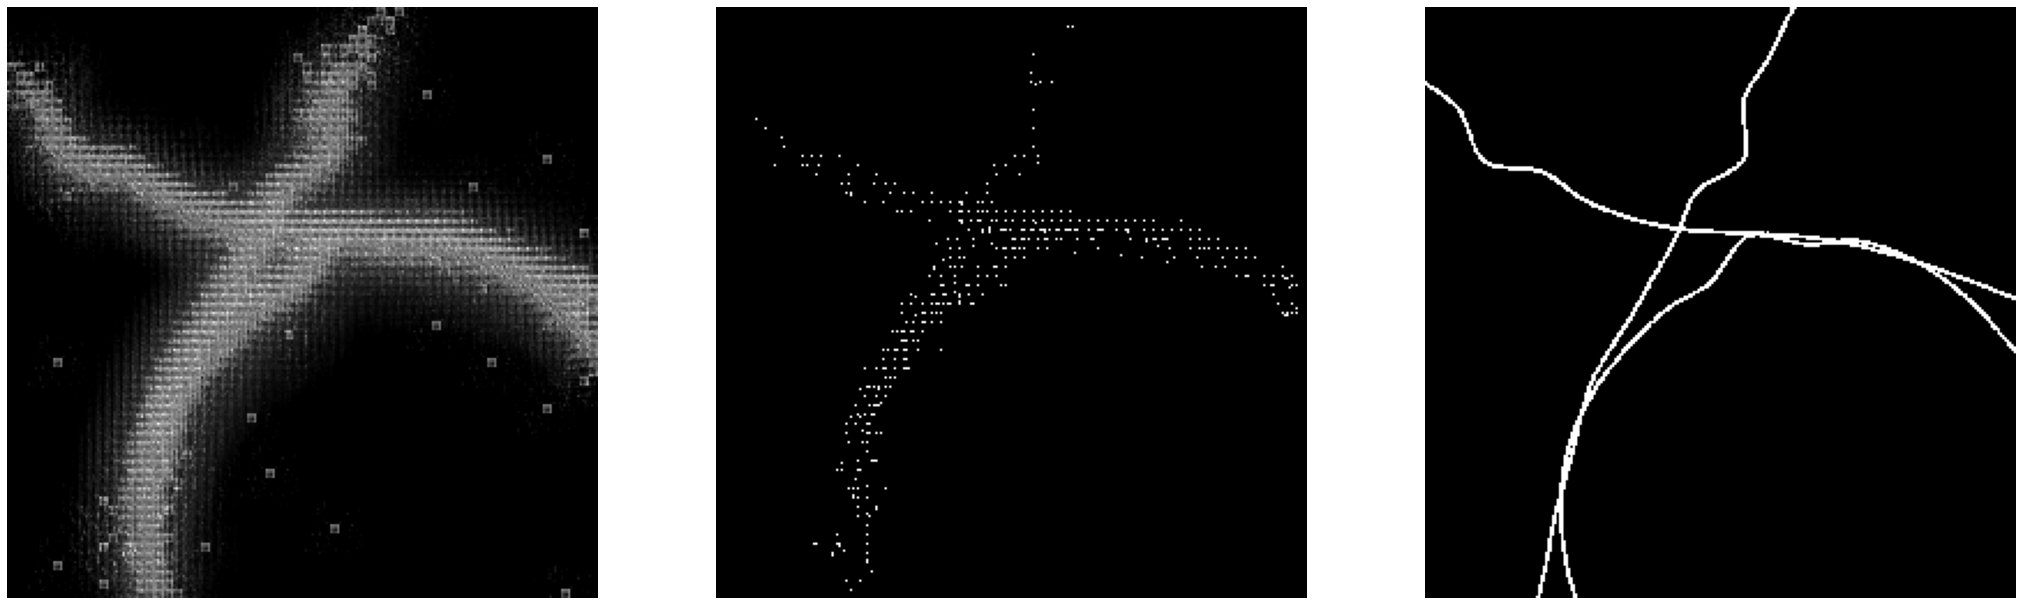

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(36, 72))
min_fil = scipy.ndimage.minimum_filter(normalized_res1,size=5)
# th = 0.95
# white = normalized_res1 >= th
# black = normalized_res1 < th
# normalized_res1[white] = 1
# normalized_res1[black] = 0
min_fil = scipy.ndimage.minimum_filter(normalized_res1,size=3)
ax[0].imshow(normalized_res1, cmap="gray", vmin=0, vmax=1)
ax[0].axis('off')
ax[1].imshow(normalized_res1>0.7, cmap="gray", vmin=0, vmax=1)
ax[1].axis('off')
ax[2].imshow(im_gt, cmap="gray", vmin=0, vmax=1)
ax[2].axis('off')

## Generate frame-GT pairs

In [ ]:
data_path = '/home/projects/yonina/yairb/autosparcom/data/MTO/sequence-as-stack-MT0.N1.HD-2D-Exp.tif'
#data_path = '/home/projects/yonina/yairb/autosparcom/data/BT_HD/BT_HD_stack.tif'
X = io.imread(data_path)
X = X.astype(float)
# for i in range(X.shape[0]):
#     f = X[i,:,:]
#     max_f = f.max()
#     min_f = f.min()
#     X[i,:,:] = (f - min_f) / (max_f - min_f)
# X_t = torch.tensor(X.astype(float)).unsqueeze_(1)
# X_interpp = F.interpolate(X_t, scale_factor=scale_factor, mode='bicubic')
# X = X_interpp.squeeze_(1).cpu().detach().numpy()
# for i in range(X.shape[0]):
#     f = X[i,:,:]
#     max_f = f.max()
#     min_f = f.min()
#     X[i,:,:] = (f - min_f) / (max_f - min_f)
    
# xmax = np.amax(X, axis=0)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))
ax[0].imshow(X[10,:,:], cmap="gray")
ax[0].axis('off')
ax[1].imshow(X[642,:,:], cmap="gray")
ax[1].axis('off')
ax[2].imshow(X[1764,:,:], cmap="gray")
ax[2].axis('off')

In [ ]:
# Create GT frames

gt_data = np.genfromtxt('/home/projects/yonina/yairb/autosparcom/data/Ground-truth-MTO/activations.csv', delimiter=',')
gt_data = gt_data[:,1:4]

gt_frames = np.zeros((3,256,256))
j=0
for i in [10,642,1764]:
    a = gt_data[gt_data[:, 0] == i+1]
    xy = a[:,1:3]
    xy = xy//25
    gt_frames[j, xy.astype(int)[:,0], xy.astype(int)[:,1]] = 1
    gt_frames[j,:,:] = gt_frames[j,:,:].T
    j=j+1
    
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))
ax[0].imshow(gt_frames[0,:,:], cmap="gray")
ax[0].axis('off')
ax[1].imshow(gt_frames[1,:,:], cmap="gray")
ax[1].axis('off')
ax[2].imshow(gt_frames[2,:,:], cmap="gray")
ax[2].axis('off')

# Supervised - Raw Patches

In [ ]:
from DataPatchesGT import DataPatchesGT
from raw_encoder import raw_encoder
from raw_decoder import raw_decoder
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch
from itertools import chain
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from VGGLoss import VGGDistance
from tifffile import imsave

In [ ]:
# Create GT frames

gt_data = np.genfromtxt('../data/Ground-truth-BT_HD/activation.csv', delimiter=',')
gt_data = gt_data[:,1:4]

gt_frames = np.zeros((361,256,256))
for i in range(361):
    a = gt_data[gt_data[:, 0] == i+1]
    xy = a[:,1:3]
    xy = xy//25
    gt_frames[i, xy.astype(int)[:,0], xy.astype(int)[:,1]] = 1
    gt_frames[i,:,:] = gt_frames[i,:,:].T
    
# imsave('../data/Ground-truth-BT_HD/BT_HD_stack_gt_frames.tif', gt_frames.astype(bool))

In [ ]:
data_path = '../data/BT_HD/BT_HD_stack.tif'
gt_path = '../data/Ground-truth-BT_HD/BT_HD_stack_gt_frames.tif'
batch_size = 16
scale_factor = 4
kernel_size = 5
lista_folds = 10
learning_rate = 0.01
no_of_batches_per_epoch = 1000
print_every_batches = 100
no_of_epochs = 10

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

trainset = DataPatchesGT(data_path, gt_path)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)


s_decoder = raw_decoder(lista_folds=lista_folds, kernel_size=kernel_size)
s_decoder = s_decoder.float()

s_decoder = nn.DataParallel(s_decoder)
s_decoder = s_decoder.to(device)

criterion_mse = nn.MSELoss()
criterion_l1 = nn.L1Loss()
optimizer = torch.optim.Adam(s_decoder.parameters(), lr = learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=no_of_batches_per_epoch, eta_min=0.0001)
vgg_dist = nn.DataParallel(VGGDistance())
vgg_dist = vgg_dist.float()
vgg_dist = vgg_dist.to(device)

for epoch in range(no_of_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inpt, label = data
        label = label.float()
        inpt = inpt.to(device)
        label = label.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward 
#         resized_input = F.interpolate(inpt, scale_factor=scale_factor, mode='bicubic')
        resized_input = inpt
        resized_input = resized_input.float()
        decoder_output = s_decoder(resized_input)
        decoder_output = decoder_output.float()
                
        # backward + optimize
        loss_mse = criterion_mse(decoder_output*(label>0), label)
        loss_l1 = criterion_l1(decoder_output, label)
        loss_l1_reg = criterion_l1(decoder_output*(label<=0), torch.ones_like(decoder_output))
        loss_vgg = vgg_dist(decoder_output*(label>0), label)
        loss = loss_vgg
        loss.sum().backward()
        optimizer.step()
        scheduler.step()
        
        running_loss += loss.sum().item()
        
        # break after set no. of batches
        if i % print_every_batches == print_every_batches - 1:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / print_every_batches:.8f}')
            running_loss = 0.0

print('Finished Training')

### Inference - entire frame

In [ ]:
X = io.imread(data_path)
X_t = torch.tensor(X.astype(float)).unsqueeze_(1)
X_interpp = F.interpolate(X_t, scale_factor=scale_factor, mode='bicubic')
X_interp = X_interpp
X_interp = X_interp.float()
X_interp.to(device)
array_result = torch.zeros_like(X_interpp)
for i in range(X_interp.shape[0]):
    with torch.no_grad():
        decoder_output = s_decoder(X_interp[i,:,:,:].unsqueeze_(0))
        v_min, v_max = decoder_output.min(), decoder_output.max()
        new_min, new_max = 0, 1
        decoder_output = (decoder_output - v_min)/(v_max - v_min)*(new_max - new_min) + new_min
    array_result[i,:,:,:] = decoder_output[0,:,:,:]

### Inference - Patches

In [ ]:
X = io.imread(data_path)
X_t = torch.tensor(X.astype(float)).unsqueeze_(1)
X_interpp = F.interpolate(X_t, scale_factor=scale_factor, mode='bicubic')
X_interp = X_interpp
X_interp = X_interp.float()
X_interp.to(device)
array_result = torch.zeros_like(X_interp)
for i in range(X_interp.shape[0]):
    with torch.no_grad():
        f = X_interp[i,:,:,:].unsqueeze_(0)
        H = f.shape[2]
        W = f.shape[3]
        kernel_size = int(H/scale_factor)
        stride = int(W/scale_factor/2)
        kh, kw = kernel_size, kernel_size  # kernel size
        dh, dw = stride, stride  # stride
        patches = f.unfold(2, kh, dh).unfold(3, kw, dw)
        unfold_shape = patches.size()
        patches = patches.contiguous().view(patches.size(0), -1, kh, kw)

        # perform the operations on each patch
        out_patches = s_decoder(patches.permute(1,0,2,3)).cpu().detach()
#         op_max = np.broadcast_to(np.expand_dims(np.amax(out_patches.numpy(),axis=(2,3)),axis=(2,3)), (49,1,64,64))
#         op_min = np.broadcast_to(np.expand_dims(np.amin(out_patches.numpy(),axis=(2,3)),axis=(2,3)), (49,1,64,64))
#         out_patches = (out_patches - op_min)/(op_max - op_min)
        window1d = np.abs(np.hanning(kernel_size))
        window2d = np.sqrt(np.outer(window1d,window1d))
        smooth_win = torch.broadcast_to(torch.tensor(window2d), out_patches.shape)
        out_patches = out_patches*smooth_win

        # Reshape back
        out_patches_orig = out_patches.permute(1,0,2,3).view(unfold_shape)

        out_patches_orig = out_patches_orig.contiguous().view(1, 1, -1, kernel_size*kernel_size)
        out_patches_orig = out_patches_orig.permute(0, 1, 3, 2) 
        out_patches_orig = out_patches_orig.contiguous().view(1, kernel_size*kernel_size, -1)
        out_patches_orig = torch.nn.functional.fold(
            out_patches_orig, output_size=(H, W), kernel_size=kernel_size, stride=stride)
        
        output = np.squeeze(out_patches_orig.permute(0,2,3,1).numpy())
        
        v_min, v_max = output.min(), output.max()
        new_min, new_max = 0, 1
        output = (output - v_min)/(v_max - v_min)*(new_max - new_min) + new_min
    array_result[i,0,:,:] = torch.tensor(output)

## Image Post-processing

In [ ]:
res = array_result.squeeze_(1).cpu().detach().numpy()

res = np.amax(res, axis=0)
# res = np.sum(res, axis=0)
# mean_t = np.mean(res, axis=0)
# im_stack = res - mean_t
# im_array = np.reshape(im_stack, [im_stack.shape[0], mean_t.size])
# corr_mat = np.matmul(im_array.T, im_array)
# corr_diag = np.diag(corr_mat)
# corr_im = np.reshape(corr_diag, [im_stack.shape[1], im_stack.shape[2]])
# res = corr_im

v_min, v_max = res.min(), res.max()
new_min, new_max = 0, 1
res = (res - v_min)/(v_max - v_min)*(new_max - new_min) + new_min

In [ ]:
idx = argrelextrema(res, np.greater)
im_res = np.zeros_like(res)
x_ind = idx[0]
y_ind = idx[1]
for i in range(len(x_ind)):
    im_res[x_ind[i], y_ind[i]] = 1
im_res = im_res

In [ ]:
from scipy.signal import argrelextrema
res = array_result.squeeze_(1).cpu().detach().numpy()
res_arr = np.zeros_like(res)

for j in range(res.shape[0]):
    cur_f = res[j,:,:]
    idx = argrelextrema(cur_f*(cur_f>0.99), np.greater)    
    im_f = np.zeros_like(cur_f)
    x_ind = idx[0]
    y_ind = idx[1]
    for i in range(len(x_ind)):
        im_f[x_ind[i], y_ind[i]] = 1
    res_arr[j,:,:] = im_f

In [ ]:
# im_res = np.amax(res_arr, axis=0)
res = np.sum(res, axis=0)
# mean_t = np.mean(res, axis=0)
# im_stack = res - mean_t
# im_array = np.reshape(im_stack, [im_stack.shape[0], mean_t.size])
# corr_mat = np.matmul(im_array.T, im_array)
# corr_diag = np.diag(corr_mat)
# corr_im = np.reshape(corr_diag, [im_stack.shape[1], im_stack.shape[2]])
# res = corr_im

v_min, v_max = res.min(), res.max()
new_min, new_max = 0, 1
res = (res - v_min)/(v_max - v_min)*(new_max - new_min) + new_min

In [ ]:
data_filename = 'Ground-truth-BT_HD/BT_HD_stack_gt.tif'
im_gt = io.imread('/home/projects/yonina/yairb/autosparcom/data/%s' % (data_filename))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 24))
ax[0].imshow((res>0.5)*im_res, cmap='Greys_r')
ax[1].imshow(im_gt, cmap='Greys_r')
plt.show()

In [ ]:
res = array_result.squeeze_(1).cpu().detach().numpy()
res = np.amax(res, axis=0)
f = res[105:165, 70:130]
plt.imshow(f*(f>0.95))
plt.show()

# LSPARCOM

In [ ]:
from DataSMLM import DataSMLM
from lista import lista
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch import zeros_like
import numpy as np
import matplotlib.pylab as plt
from IPython import display
from livelossplot import PlotLosses
from matplotlib.lines import Line2D

%matplotlib inline


def plot_grad_flow(named_parameters):
    '''Plots the gradients flowing through different layers in the net during training.
    Can be used for checking for possible gradient vanishing / exploding problems.
    
    Usage: Plug this function in Trainer class after loss.backwards() as 
    "plot_grad_flow(self.model.named_parameters())" to visualize the gradient flow'''
    ave_grads = []
    max_grads= []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and (n != 's'):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean())
            max_grads.append(p.grad.abs().max())
    plt.bar(np.arange(len(max_grads)), max_grads, alpha=0.1, lw=1, color="c")
    plt.bar(np.arange(len(max_grads)), ave_grads, alpha=0.1, lw=1, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, lw=2, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(left=0, right=len(ave_grads))
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
    plt.legend([Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="b", lw=4),
                Line2D([0], [0], color="k", lw=4)], ['max-gradient', 'mean-gradient', 'zero-gradient'])


batch_size = 50
data_path = '/home/projects/yonina/yairb/DataGilli/TUI4_VAR_REG.mat'

trainset = DataSMLM(data_path)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=8)


net = lista(folds=10, kernel_size=25)
net = net.float()

criterion_mse = nn.MSELoss()
criterion_l1 = nn.L1Loss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)


liveloss = PlotLosses()

nan_loss = False
low_loss = False
weights_data = []
logs = {}
for epoch in range(750):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inpt, label = data
        inpt = inpt.float()
        label = label.float()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = net(inpt)
        mask = label>0
        loss_mse = criterion_mse(output*mask, label)
        loss_l1 = criterion_l1(output*(~mask), zeros_like(output))
        loss = loss_l1 + loss_mse
        loss.backward()
        optimizer.step()
        plot_grad_flow(net.named_parameters())
        
        # check if loss is nan
        if np.isnan(loss.item()):
            print("NaN loss - exit training...")
            nan_loss = True
            break
                
        # print statistics
        running_loss += loss.item()
        if i % 5 == 4:    # print every 100 batches
            cur_loss = running_loss / 5
#             logs['log loss'] = cur_loss
#             liveloss.update(logs)
#             liveloss.send()
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {cur_loss:.5f}')
            running_loss = 0.0
        
        if i > 50:
            low_loss = True
            for name, weight in net.named_parameters():
                if 'conv' in name:
                    weights_data.append(weight.data)
            print("Low loss - exit training...")
            break
            
#             #Plot current result
#             fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 24))
#             ax[0].imshow(inpt.squeeze_(0).squeeze_(0).detach().numpy())
#             ax[1].imshow(output.squeeze_(0).squeeze_(0).detach().numpy())
#             display.display(plt.gcf())
#             display.clear_output(wait=True)
            
    if nan_loss or low_loss:
        break

if low_loss:
    fig, ax = plt.subplots(nrows=len(weights_data), ncols=1, figsize=(20, 20))
    for i in range(len(weights_data)):
        ax[i].imshow(weights_data[i][0].permute(1, 2, 0).numpy())
    
print('Finished Training')

# Gradient Flow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def plot_grad_flow(named_parameters):
    '''Plots the gradients flowing through different layers in the net during training.
    Can be used for checking for possible gradient vanishing / exploding problems.
    
    Usage: Plug this function in Trainer class after loss.backwards() as 
    "plot_grad_flow(self.model.named_parameters())" to visualize the gradient flow'''
    ave_grads = []
    max_grads= []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean().item())
            max_grads.append(p.grad.abs().max().item())
    plt.bar(np.arange(len(max_grads)), max_grads, alpha=0.1, lw=1, color="c")
    plt.bar(np.arange(len(max_grads)), ave_grads, alpha=0.1, lw=1, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, lw=2, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(left=0, right=len(ave_grads))
    plt.ylim(bottom = -0.001, top=0.02) # zoom in on the lower gradient regions
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
    plt.legend([Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="b", lw=4),
                Line2D([0], [0], color="k", lw=4)], ['max-gradient', 'mean-gradient', 'zero-gradient'])